<a href="https://colab.research.google.com/github/vinceriot/ML_lab/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
df=pd.read_csv('/content/drive/MyDrive/datapy/data.csv', delimiter=';')

In [5]:
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [8]:
# Проверяем, какие есть классы в целевой переменной Target
vals = df["Target"].unique()
print(vals)

['Dropout' 'Graduate' 'Enrolled']


In [10]:
# Выбираем признаки для кластеризации (кроме целевой переменной)
cols_for_clusters = df.columns[:-1]  # Исключаем столбец 'Target'
print(cols_for_clusters)

# Делаем копию исходного датасета
df_copy = df.copy()

# Убираем целевую переменную из набора данных
df_without_label = df_copy[cols_for_clusters].copy()
print(df_without_label.head())

# Кодируем целевые метки (если необходимо)
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_copy[['Target']] = encoder.fit_transform(df_copy[['Target']])
print(df_copy.head())

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

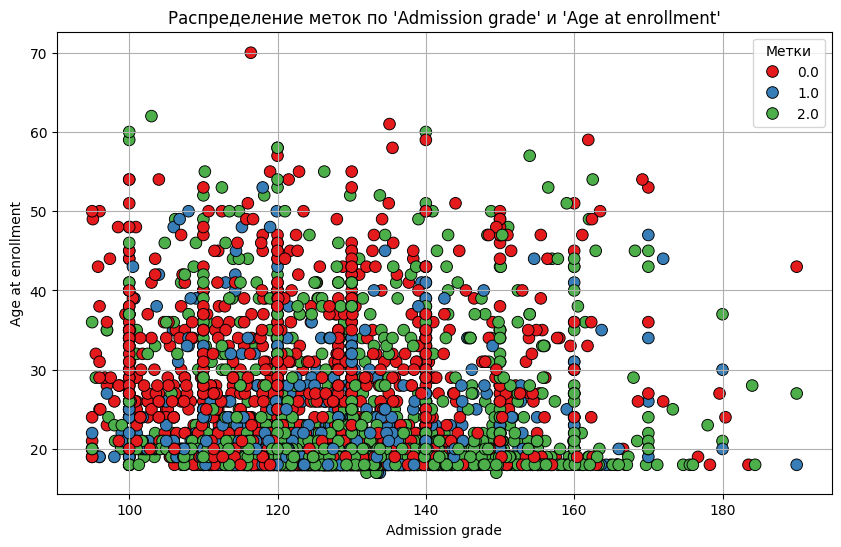

In [11]:
# Визуализируем распределение классов в исходном датасете
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_copy, x='Admission grade', y='Age at enrollment', hue='Target', palette='Set1', s=70, edgecolor="k")

plt.title("Распределение меток по 'Admission grade' и 'Age at enrollment'")
plt.xlabel("Admission grade")
plt.ylabel("Age at enrollment")
plt.legend(title="Метки")
plt.grid(True)
plt.show()

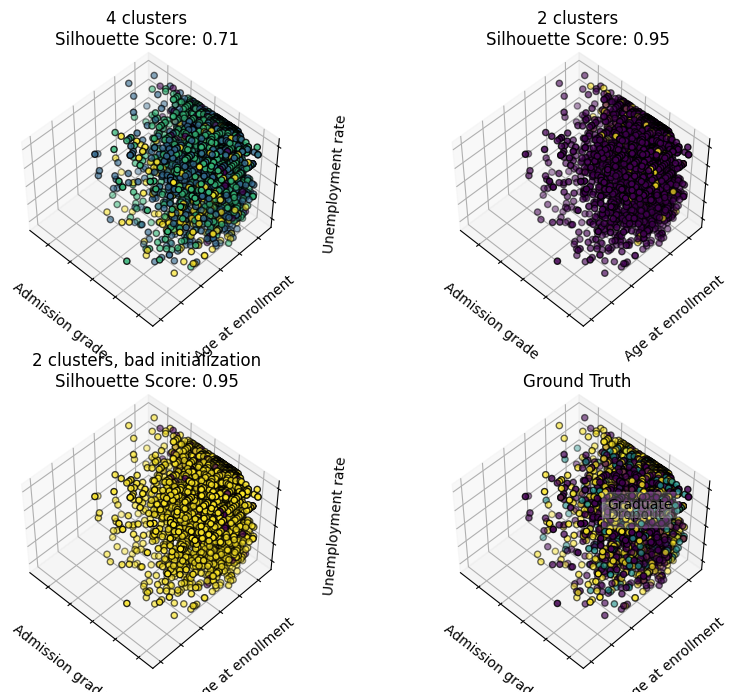

In [12]:
X = df_without_label  # Признаки
y = df_copy[['Target']]  # Целевая переменная

# Визуализируем результаты кластеризации с коэффициентом силуэта
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import mpl_toolkits.mplot3d

def plot_clusters_with_silhouette(X, y):
    estimators = [
        ("k_means_4", KMeans(n_clusters=4)),
        ("k_means_2", KMeans(n_clusters=2)),
        ("k_means_bad_init", KMeans(n_clusters=2, n_init=1, init="random")),
    ]

    fig = plt.figure(figsize=(10, 8))
    titles = ["4 clusters", "2 clusters", "2 clusters, bad initialization"]
    for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
        ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
        est.fit(X)
        labels = est.labels_

        # Оценка методом силуэта
        silhouette_avg = silhouette_score(X, labels)

        ax.scatter(X["Admission grade"], X["Age at enrollment"], X["Unemployment rate"], c=labels.astype(float), edgecolor="k")

        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.zaxis.set_ticklabels([])
        ax.set_xlabel("Admission grade")
        ax.set_ylabel("Age at enrollment")
        ax.set_zlabel("Unemployment rate")
        ax.set_title(f"{title}\nSilhouette Score: {silhouette_avg:.2f}")

    # Истинные метки
    ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

    for name, label in [(vals[0], 1), (vals[1], 0)]:
        ds = df[df["Target"] == name]
        ax.text3D(
            ds["Admission grade"].mean(),
            ds["Age at enrollment"].mean(),
            ds["Unemployment rate"].mean(),
            name,
            horizontalalignment="center",
            bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
        )

    ax.scatter(X["Admission grade"], X["Age at enrollment"], X["Unemployment rate"], c=y, edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Admission grade")
    ax.set_ylabel("Age at enrollment")
    ax.set_zlabel("Unemployment rate")
    ax.set_title("Ground Truth")

    plt.subplots_adjust(wspace=0.25, hspace=0.25)
    plt.show()

plot_clusters_with_silhouette(X, y)


[15, 0.5396661393320773, 0.03042139045763178, array([[ 1.14423077e+00,  1.38701923e+01,  2.40745192e+00,
         9.50545192e+03,  1.00000000e+00,  2.25961538e+00,
         1.34867187e+02,  1.74879808e+00,  1.89831731e+01,
         2.15072115e+01,  6.37379808e+00,  6.47475962e+00,
         1.26974519e+02,  6.53846154e-01,  8.41346154e-03,
         3.72596154e-02,  9.55528846e-01,  1.93509615e-01,
         3.64182692e-01,  2.12680288e+01,  1.68269231e-02,
         2.51201923e-01,  7.46394231e+00,  8.54206731e+00,
         6.12019231e+00,  1.22819148e+01,  1.94711538e-01,
         2.46394231e-01,  7.88341346e+00,  8.66346154e+00,
         6.37379808e+00,  1.21340772e+01,  2.03125000e-01,
         1.19915865e+01,  1.33269231e+00, -2.96911058e-01],
       [ 1.01762115e+00,  1.15682819e+01,  1.51101322e+00,
         1.63704846e+02,  1.00000000e+00,  3.00881057e+00,
         1.37393833e+02,  2.96035242e+00,  1.54713656e+01,
         1.86387665e+01,  6.80176211e+00,  7.15859031e+00,
         

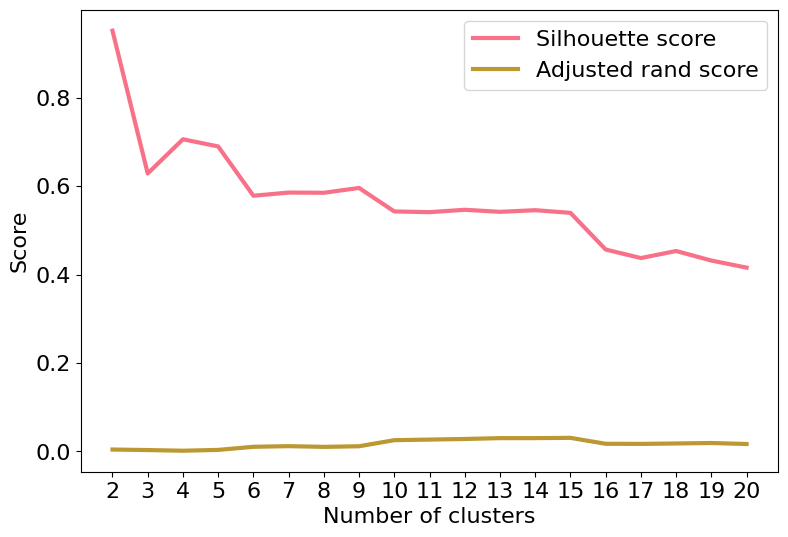

In [14]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np

def plot_silhouette_ari(X, y):
    n_clusters = np.arange(2, 21)
    y_flat = y.values.flatten()
    best_metric = [0, 10000, 0, []]

    silhouette_score_values = []
    adjusted_rand_score_values = []

    for n in n_clusters:
        clusterer = KMeans(n_clusters=n, max_iter=300, n_init=30)
        clusterer.fit(X)
        y_pred = clusterer.predict(X)

        score1 = metrics.silhouette_score(X, y_pred)
        silhouette_score_values.append(score1)

        score2 = metrics.adjusted_rand_score(y_flat, y_pred)
        adjusted_rand_score_values.append(score2)

        if score1 < best_metric[1] and score2 > best_metric[2]:
            best_metric[1] = score1
            best_metric[2] = score2
            best_metric[3] = clusterer.cluster_centers_
            best_metric[0] = n

    print(best_metric)
    plt.figure(figsize=(9, 6))
    plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
    plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
    plt.xlabel('Number of clusters', size=16)
    plt.ylabel('Score', size=16)
    plt.xticks(n_clusters, size=16)
    plt.yticks(size=16)
    plt.legend(loc='best', fontsize=16)
    plt.show()

plot_silhouette_ari(X, y)


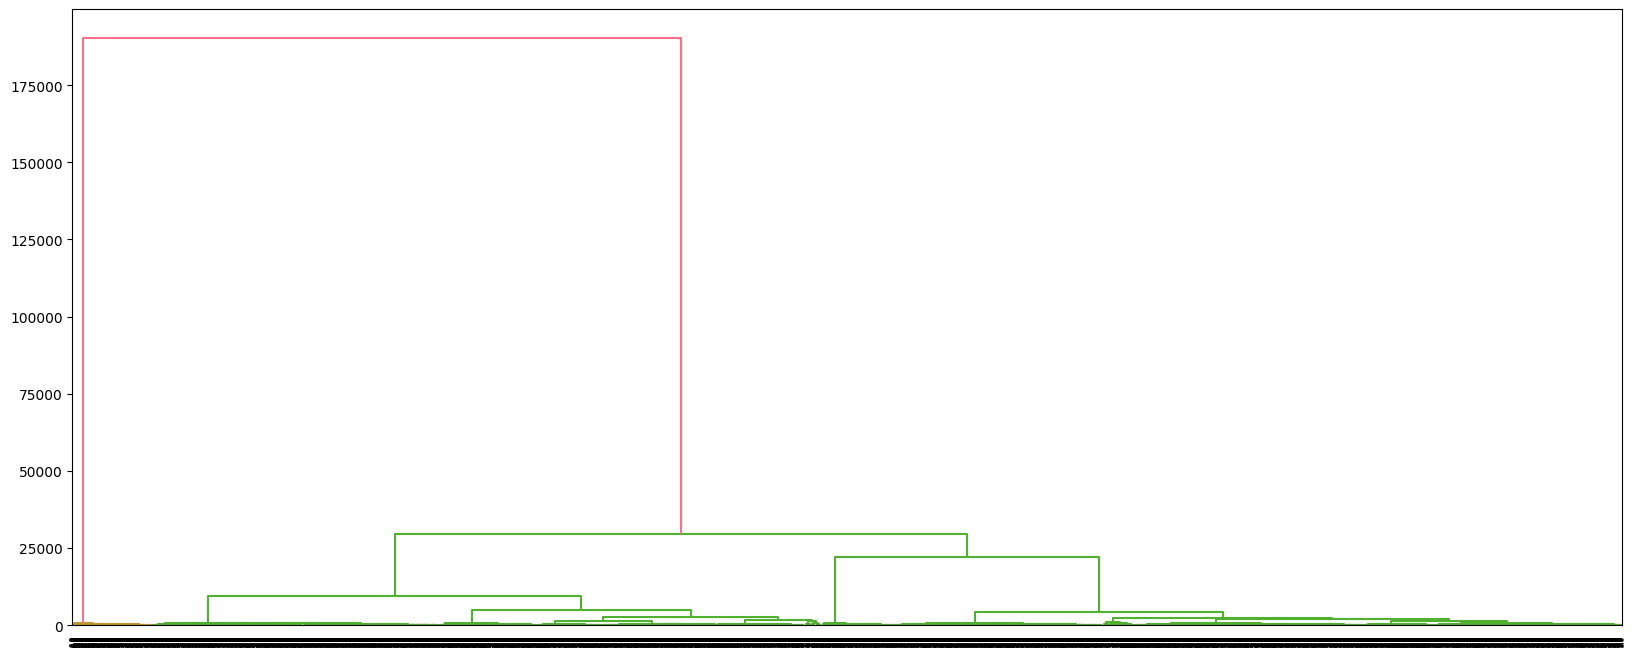

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(X, y):
    y_flat = y.values.flatten()
    samples = X.values
    mergings = linkage(samples, method='ward')

    plt.figure(figsize=(20, 8))
    dendrogram(mergings, labels=list(y_flat), leaf_rotation=90, leaf_font_size=5)
    plt.show()

plot_dendrogram(X, y)
